# Malignant-Comments-Classifier

Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Training dataset

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Predicting dataset

In [3]:
df_test=pd.read_csv('test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
# check shape of the train and test dataset
print(df_train.shape)
print(df_test.shape)

(159571, 8)
(153164, 2)


In [5]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [6]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

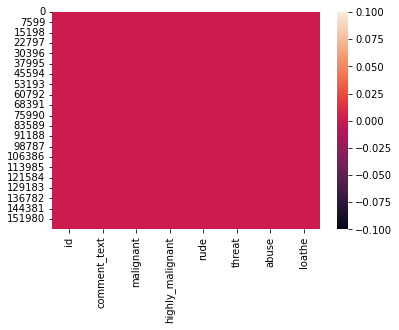

In [7]:
# check null values of train data using heatmap
sns.heatmap(df_train.isnull())

<AxesSubplot:>

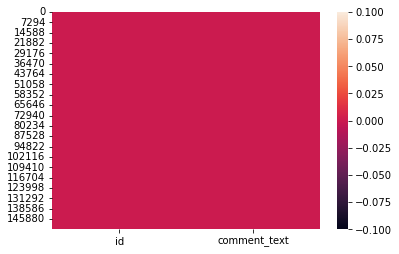

In [8]:
# check null values of train using heatmap
sns.heatmap(df_test.isnull())

In [9]:
# check information of train data
print(df_train.info())

# check information of test data
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


In [10]:
# check descriptive statistics of the  train dataset
df_train.describe(include='all')

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

<AxesSubplot:>

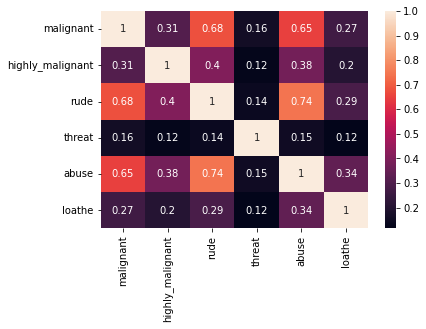

In [12]:
# check correlation of numerical features using heatmap
sns.heatmap(df_train.corr(), annot=True)

In [13]:
df_train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

DATA CLEANING

In [14]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing.head()

,Total,Percent
id,0,0.0
comment_text,0,0.0
malignant,0,0.0
highly_malignant,0,0.0
rude,0,0.0


EDA

malignant


0    144277
1     15294
Name: malignant, dtype: int64


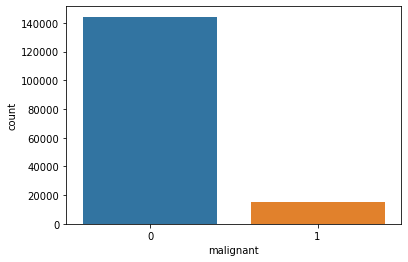

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


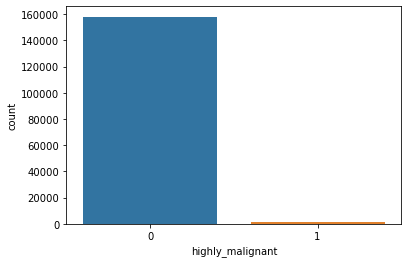

loathe


0    158166
1      1405
Name: loathe, dtype: int64


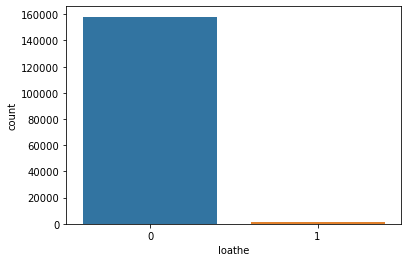

rude


0    151122
1      8449
Name: rude, dtype: int64


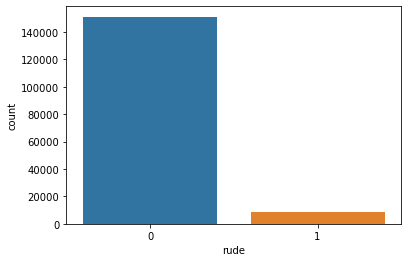

abuse


0    151694
1      7877
Name: abuse, dtype: int64


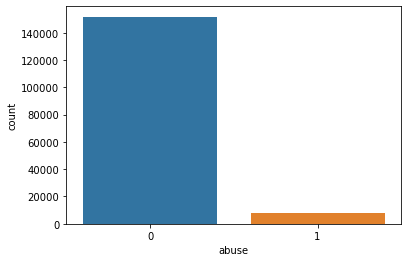

threat


0    159093
1       478
Name: threat, dtype: int64


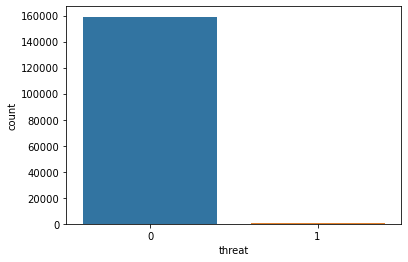

In [15]:
col=['malignant' , 'highly_malignant' , 'loathe' , 'rude' , 'abuse' , 'threat']
for i in col:
    print(i)
    print("\n")
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

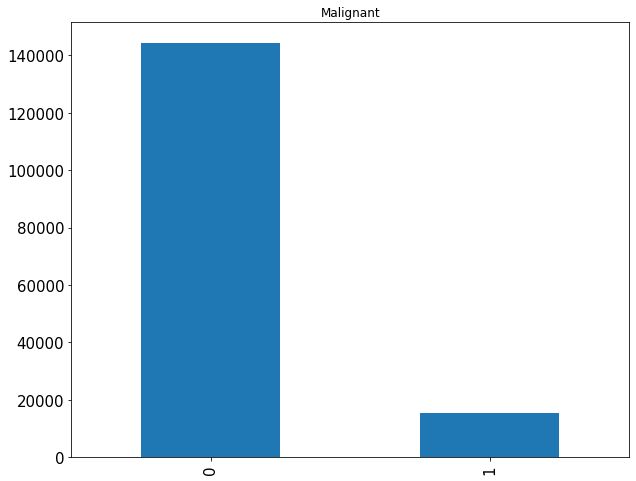

In [16]:
plt.subplot()
df_train['malignant'].value_counts().plot(kind='bar',title='Malignant',figsize=(10,8),fontsize=15);

<AxesSubplot:title={'center':'Highly Malignant'}>

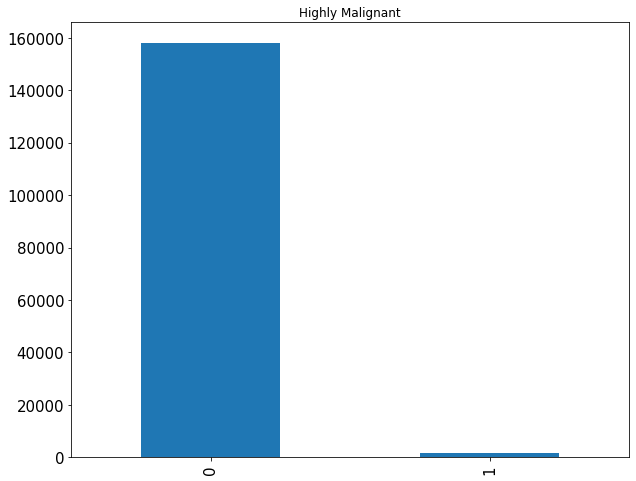

In [17]:
plt.subplot()
df_train['highly_malignant'].value_counts().plot(kind='bar',title='Highly Malignant',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Loathe'}>

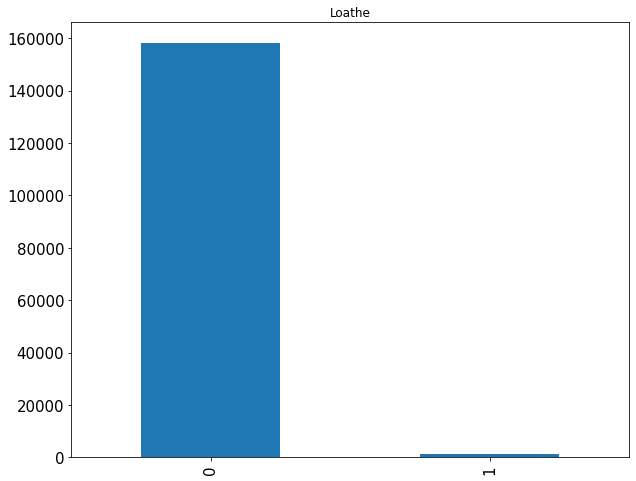

In [18]:
plt.subplot()
df_train['loathe'].value_counts().plot(kind='bar',title='Loathe',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Rude'}>

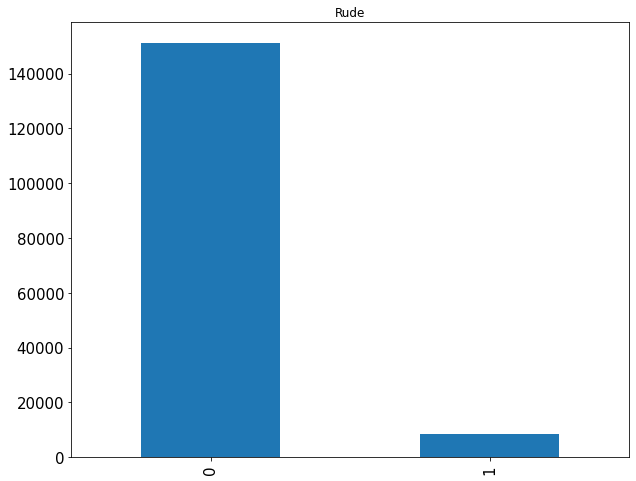

In [19]:
plt.subplot()
df_train['rude'].value_counts().plot(kind='bar',title='Rude',figsize=(10,8),fontsize=15)

<AxesSubplot:title={'center':'Abuse'}>

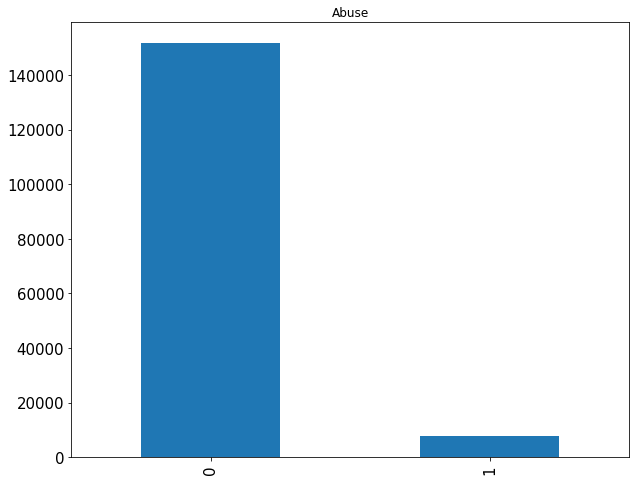

In [20]:
plt.subplot()
df_train['abuse'].value_counts().plot(kind='bar',title='Abuse',figsize=(10,8),fontsize=15)

<AxesSubplot:>

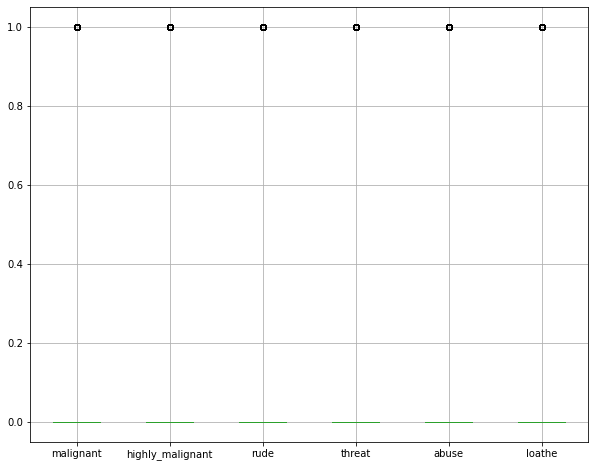

In [21]:
plt.figure(figsize=(10,8))
df_train.boxplot()

<Figure size 720x576 with 0 Axes>

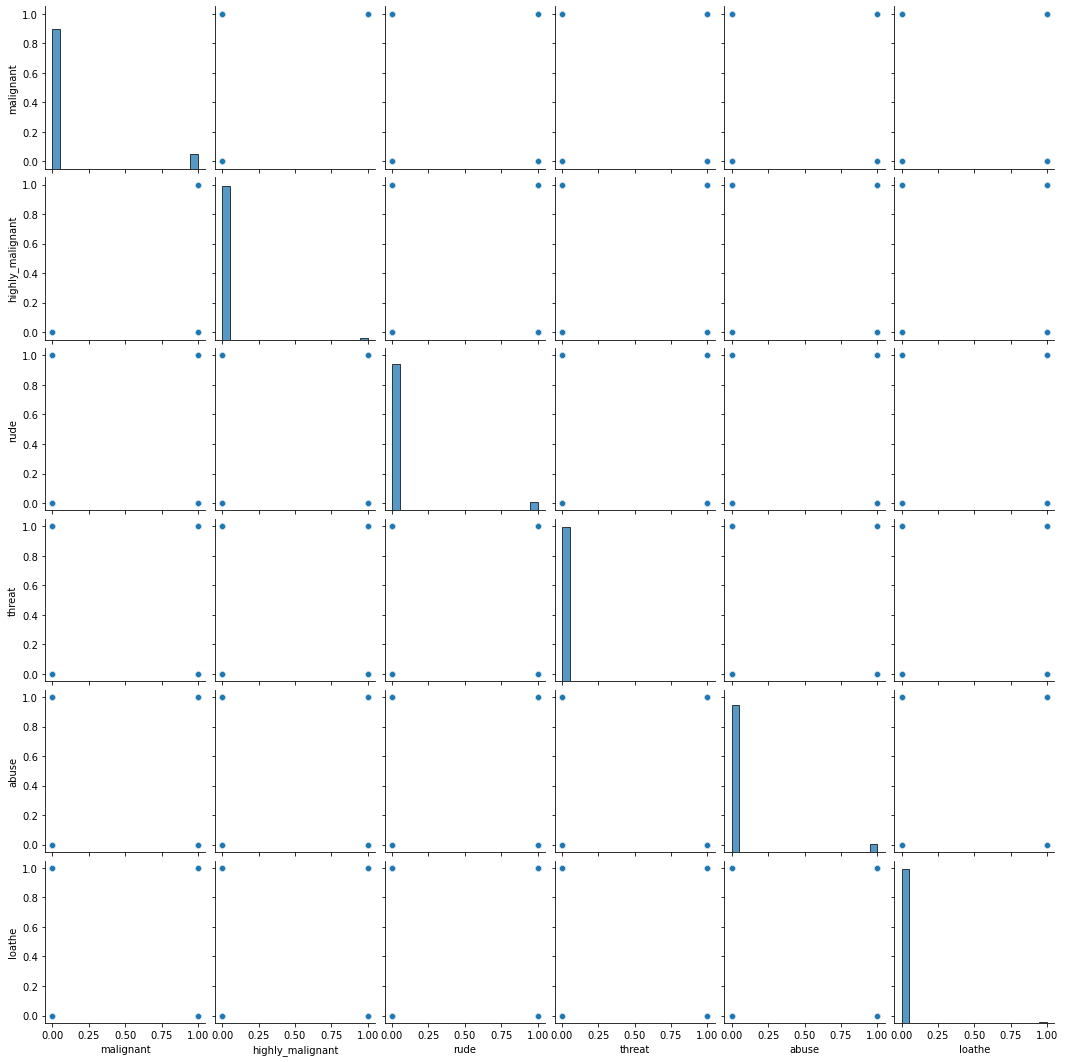

In [22]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_train)
plt.show()

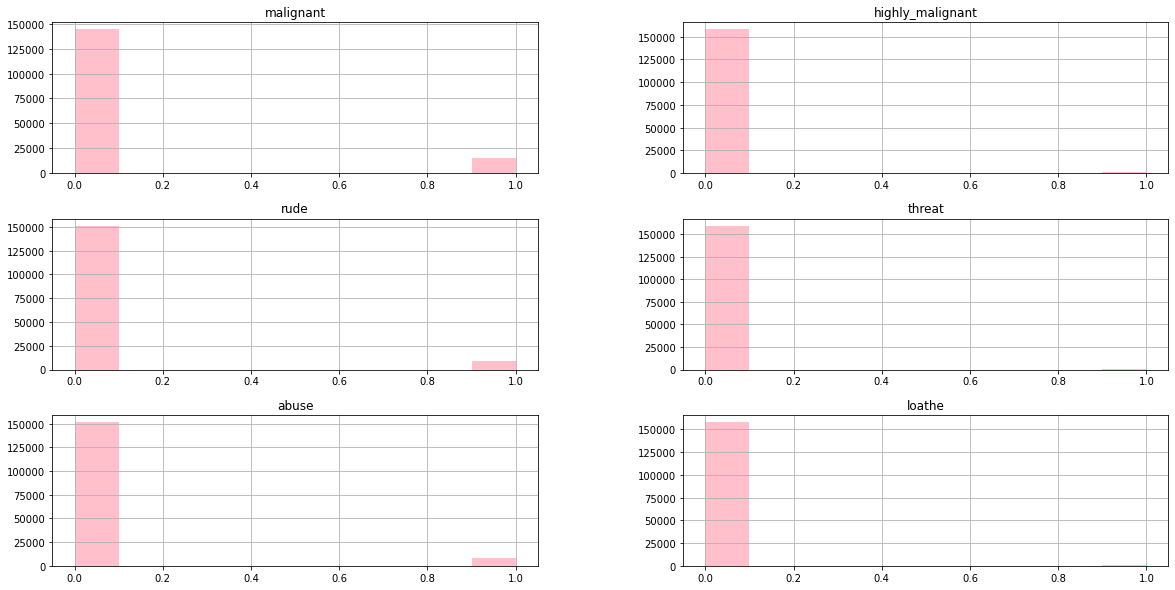

In [23]:
df_train.hist(color='pink',figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='malignant', ylabel='Density'>

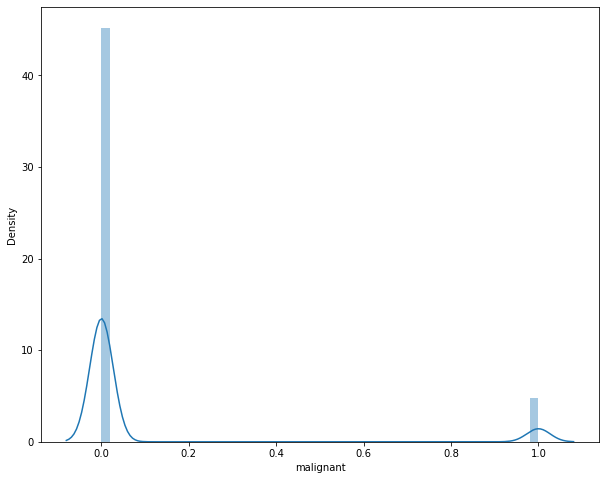

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['malignant'])

<AxesSubplot:xlabel='highly_malignant', ylabel='Density'>

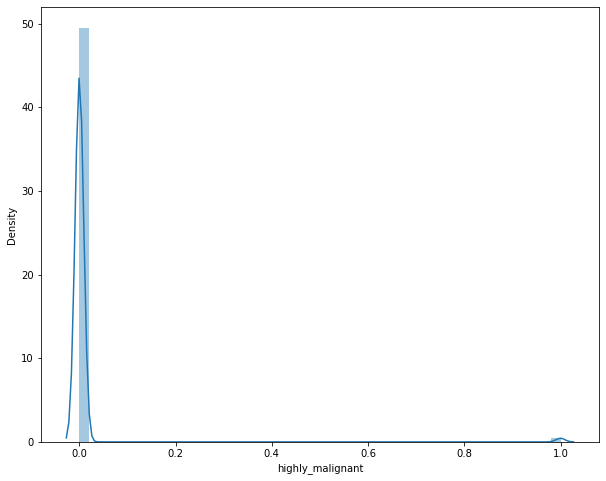

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['highly_malignant'])

<AxesSubplot:xlabel='abuse', ylabel='Density'>

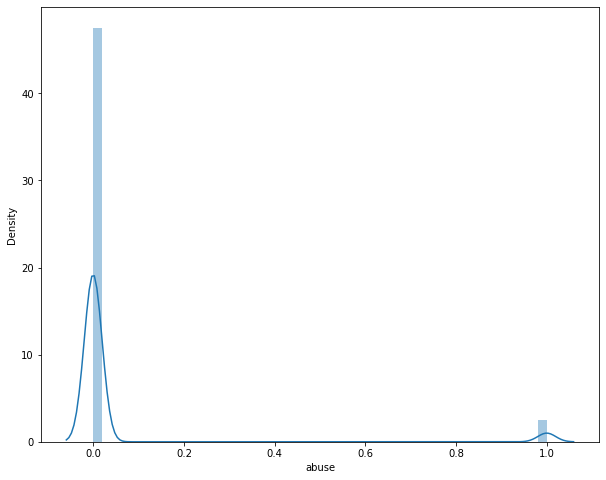

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['abuse'])

<AxesSubplot:xlabel='threat', ylabel='Density'>

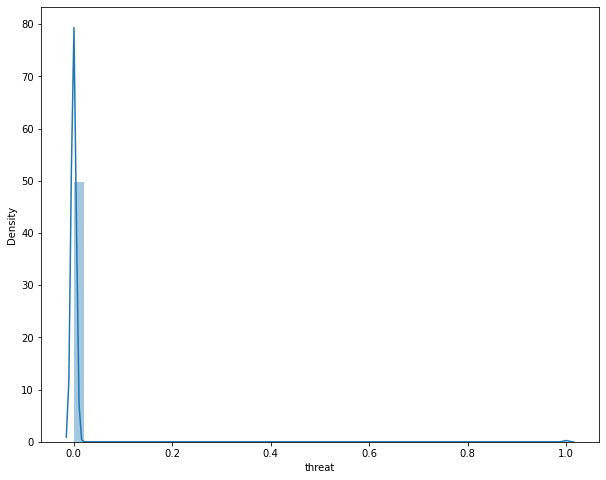

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['threat'])

<AxesSubplot:xlabel='rude', ylabel='Density'>

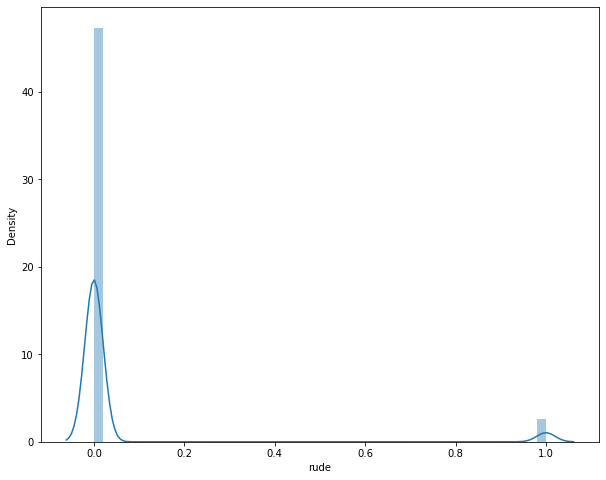

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['rude'])

<AxesSubplot:xlabel='loathe', ylabel='Density'>

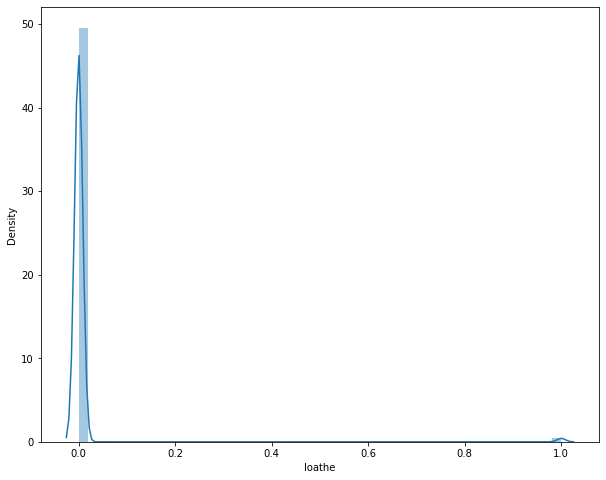

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['loathe'])

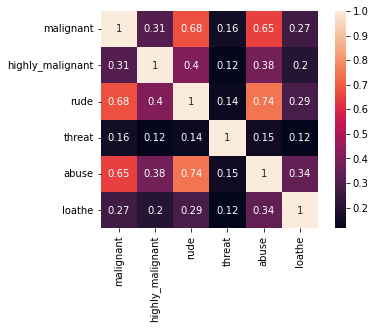

In [30]:
corr=df_train.corr()
sns.heatmap(corr,annot=True,square=True)
plt.yticks(rotation=0)
plt.show()

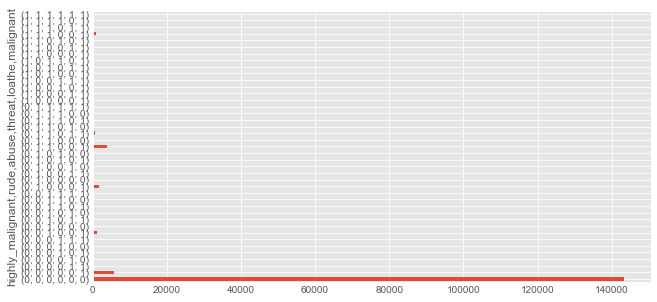

In [31]:
import matplotlib.style as style
style.use('seaborn-darkgrid')
style.use('ggplot')
df_train.groupby(['highly_malignant' , 'rude' , 'abuse' , 'threat' , 'loathe'])['malignant'].value_counts().plot(kind='barh',figsize=(10,5))
plt.xticks()
plt.xlabel(None)
plt.show()

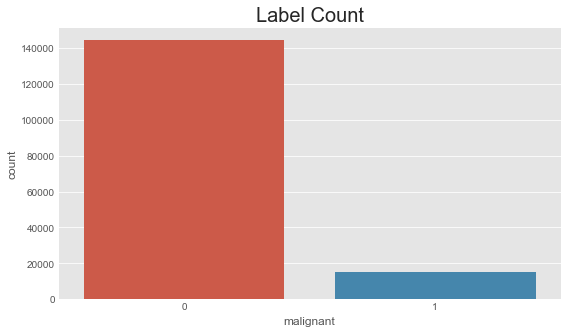

In [32]:
# plot label column count
plt.figure(figsize=(9,5))
sns.countplot(df_train['malignant'])
plt.title("Label Count",fontsize=20)
plt.show()

In [33]:
# create a label feature, which is combination of all target columns.
all_labels = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_train['Label'] = df_train[all_labels].sum(axis=1)

In [34]:
# Here, we convert label column in form of 0 and 1 (scaling).
# 0 = good comments and 1 = bad comments
df_train['Label'] = df_train['Label']>0
df_train['Label'] = df_train['Label'].astype(int)

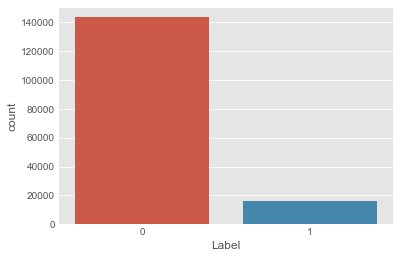

0    143346
1     16225
Name: Label, dtype: int64

In [35]:
# Here, we plot our label column
sns.countplot(df_train['Label'])
plt.show()

df_train['Label'].value_counts()

0 malignant
1 highly_malignant
2 abuse
3 threat
4 rude
5 loathe


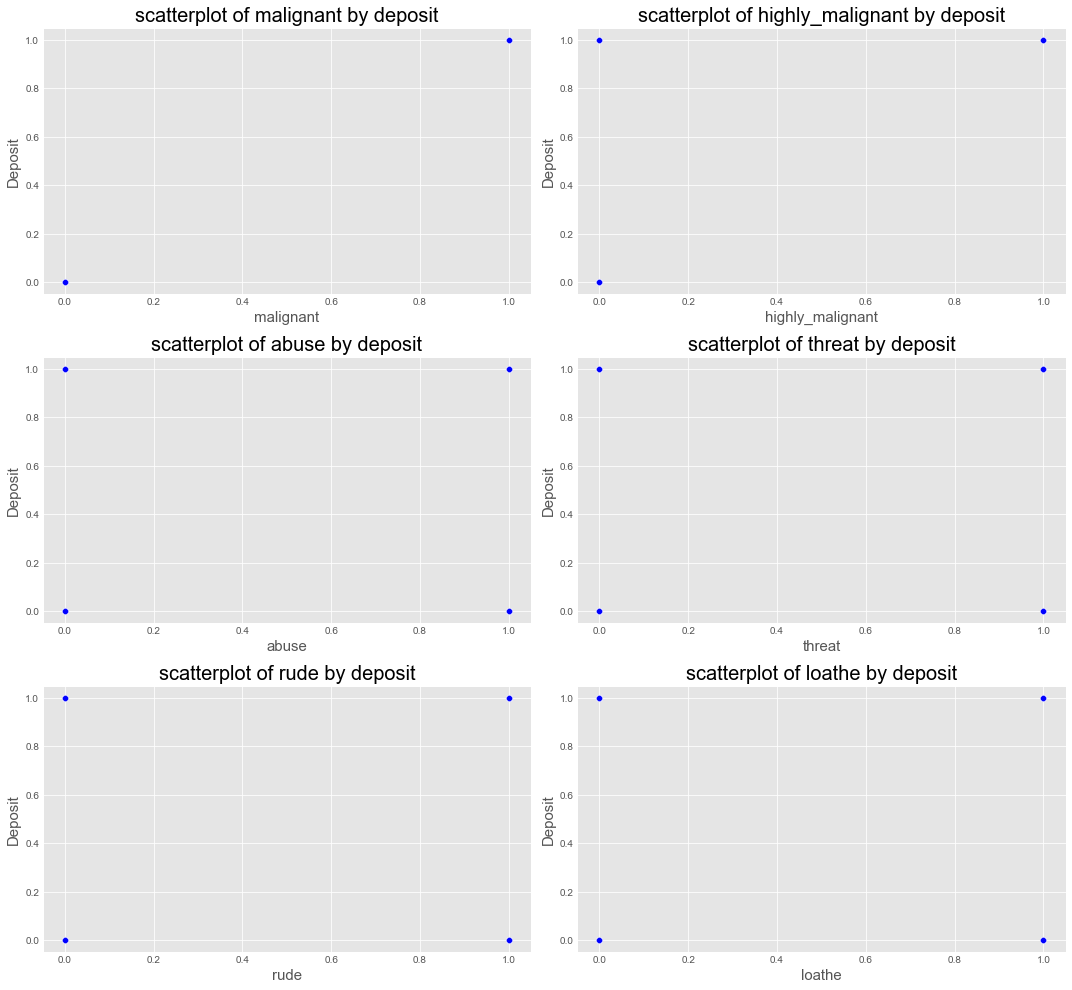

In [36]:
df_num=df_train[['malignant' , 'highly_malignant' , 'abuse' , 'threat' , 'rude' , 'loathe']]
col=['malignant' , 'highly_malignant' , 'abuse' , 'threat' , 'rude' , 'loathe']
plt.figure(figsize=(15,18))
for i, v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=v,y='malignant',data=df_num,color='blue')
    plt.title("scatterplot of {} by deposit".format(v),size=20,color="black")
    plt.xlabel("{}".format(v),size=15)
    plt.ylabel("Deposit",size=15)
plt.tight_layout()
plt.show()

In [37]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
smote = SMOTE()
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string

In [38]:
# calculating comments length
df_train["comment_length"] = df_train["comment_text"].str.len()

In [39]:
# Convert all comments text into lower case
df_train['Cleaned_comment_text'] = df_train['comment_text'].str.lower()
df_test['cleaned_comment_text'] = df_test['comment_text'].str.lower()

In [40]:
# remove punctuation from cleaned comment text column
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].str.replace('[^\w\s]','')
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].str.replace('[^\w\s]','')

In [41]:
# removing stopwords from cleaned comment text column
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label,comment_length,Cleaned_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww matches background colour im seemingly st...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,sir hero chance remember page thats


In [42]:
# Now, let's remove digits from the cleaned comment text column
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].str.replace('\d+', '')
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].str.replace('\d+', '')

In [43]:
# Here, we use Lemmatizing. Lemmatization is the process of converting a word to its base form.
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(x) for x in x.split()))
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(x) for x in x.split()))
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label,comment_length,Cleaned_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww match background colour im seemingly stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,cant make real suggestion improvement wondered...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,sir hero chance remember page thats


In [44]:
# calculating cleaned comments length
df_train["Cleaned_comment_length"] = df_train["Cleaned_comment_text"].str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label,comment_length,Cleaned_comment_text,Cleaned_comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation edits made username hardcore metal...,175
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww match background colour im seemingly stuc...,71
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,hey man im really trying edit war guy constant...,144
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,cant make real suggestion improvement wondered...,370
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,sir hero chance remember page thats,35


In [45]:
df_train['length'] = df_train['comment_text'].str.len()
df_train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label,comment_length,Cleaned_comment_text,Cleaned_comment_length,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation edits made username hardcore metal...,175,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww match background colour im seemingly stuc...,71,112


In [46]:
# total reduced length
print("Original Length: ",df_train['comment_length'].sum())
print("Cleaned Length: ",df_train['Cleaned_comment_length'].sum())

Original Length:  62893130
Cleaned Length:  39446917


In [47]:
# convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features=8000, stop_words='english')
feature = tf_vec.fit_transform(df_train['Cleaned_comment_text'])

# split the target column.
# here, our target column is label and it is a classification problem.
x = feature
y = df_train['Label']

In [48]:
# convert test data's text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features=8000, stop_words='english')
feature_test = tf_vec.fit_transform(df_test['cleaned_comment_text'])

In [49]:
# Hear, we use SMOTE(resampling) method to cop up with imbalanced classification of target variable.
# SMOTE(Synthetic Minority Oversampling Technique) algorithm generates synthetic samples of minority class.
x_smote,y_smote = smote.fit_resample(x,y)

# check shape of the train dataset before oversampling
print(x.shape)
print(y.shape)

# check shape of the train dataset after oversampling 
print(x_smote.shape)
print(y_smote.shape)

(159571, 8000)
(159571,)
(286692, 8000)
(286692,)


In [50]:
# check the counts of original target column
y.value_counts()

# check the count of target column after oversampling 
y_smote.value_counts()

0    143346
1    143346
Name: Label, dtype: int64

In [51]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.20,random_state=0)

MODEL BUILDING

SELECT THE BEST MODEL

In [52]:
# our problem is classification type of problem.
# import useful libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,auc,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV

model = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(),MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm))
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("\n")

Accuracy of LogisticRegression(solver='liblinear') is:
Accuracy of training model is: 0.9356101729648184
Accuracy Score: 0.928652400634821
Confusion matrix: 
 [[26180  2342]
 [ 1749 27068]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     28522
           1       0.92      0.94      0.93     28817

    accuracy                           0.93     57339
   macro avg       0.93      0.93      0.93     57339
weighted avg       0.93      0.93      0.93     57339



Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.9967866127759393
Accuracy Score: 0.9442962032822337
Confusion matrix: 
 [[26356  2166]
 [ 1028 27789]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     28522
           1       0.93      0.96      0.95     28817

    accuracy                           0.94     57339
   macro avg       0.95      0.94   

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters = {'learning_rate':[0.01,0.1]}
clf = GridSearchCV(gbc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.1}


In [54]:
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(x_train,y_train)
train = gbc.score(x_train,y_train)
predgbc = gbc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predgbc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predgbc))
print("Classification report:","\n",classification_report(y_test,predgbc))

Accuracy of training model is: 0.8377217651393267
Accuracy Score: 83.35687751791974
Confusion matrix: 
 [[27430  1092]
 [ 8451 20366]]
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.96      0.85     28522
           1       0.95      0.71      0.81     28817

    accuracy                           0.83     57339
   macro avg       0.86      0.83      0.83     57339
weighted avg       0.86      0.83      0.83     57339



Target the columns

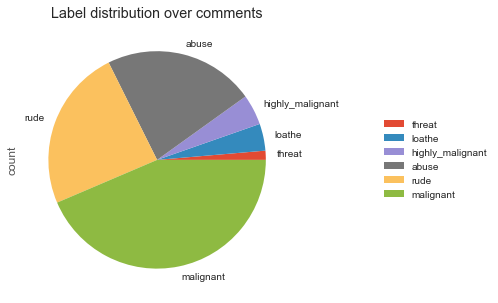

In [55]:
target_cols=['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution=df_train[target_cols].sum()\
                                .to_frame()\
                                .rename(columns={0:'count'})\
                                .sort_values('count')
df_distribution.plot.pie(y='count' ,
                                        title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [56]:
target_data = df_train[target_cols]
df_train['bad']=df_train[target_cols].sum(axis=1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


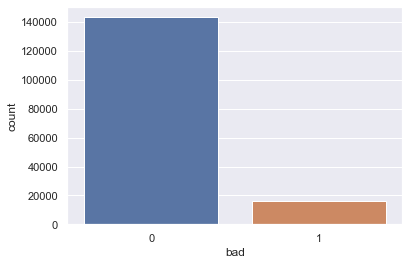

In [57]:
sns.set()
sns.countplot(x="bad",data=df_train)
plt.show()

In [58]:
# convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features=tf_vec.fit_transform(df_train['comment_text'])
x=features

In [59]:
df_train.shape

(159571, 14)

In [60]:
df_test.shape

(153164, 3)

In [61]:
y=df_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=30)

In [62]:
y_train.shape,y_test.shape

((159541,), (30,))

Decision Tree Classifier

In [63]:
DTC = DecisionTreeClassifier()

DTC.fit(x_train, y_train)
y_pred_train = DTC.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DTC.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987652076895595
Test accuracy is 0.9333333333333333
[[25  0]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.60      0.75         5

    accuracy                           0.93        30
   macro avg       0.96      0.80      0.86        30
weighted avg       0.94      0.93      0.93        30



Random Forest Classifier

In [64]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RFC.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987526717270169
Test accuracy is 0.9333333333333333
[[25  0]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.60      0.75         5

    accuracy                           0.93        30
   macro avg       0.96      0.80      0.86        30
weighted avg       0.94      0.93      0.93        30



XGBOOST

In [65]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9603926263468324
Test accuracy is 0.9333333333333333
[[25  0]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.60      0.75         5

    accuracy                           0.93        30
   macro avg       0.96      0.80      0.86        30
weighted avg       0.94      0.93      0.93        30



AdaBoostClassifier

In [66]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9497683980920265
Test accuracy is 0.9333333333333333
[[25  0]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.60      0.75         5

    accuracy                           0.93        30
   macro avg       0.96      0.80      0.86        30
weighted avg       0.94      0.93      0.93        30



In [67]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987464037457456
Test accuracy is 0.9333333333333333
cross validation score : 95.66399866799561
[[25  0]
 [ 2  3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.60      0.75         5

    accuracy                           0.93        30
   macro avg       0.96      0.80      0.86        30
weighted avg       0.94      0.93      0.93        30



From the above, the best model  randomforest classifier, which is 99%.

# THANK YOU